Lab-01: Write a program to execute the following image pre-processing.
• Read images from a folder.
• Resize images and save to a folder.
• Apply color transform on images and save to a folder.
• Normalize images and save into a folder.
• Filter images and save into a folder

Applying resize, color transformation and normalization on images

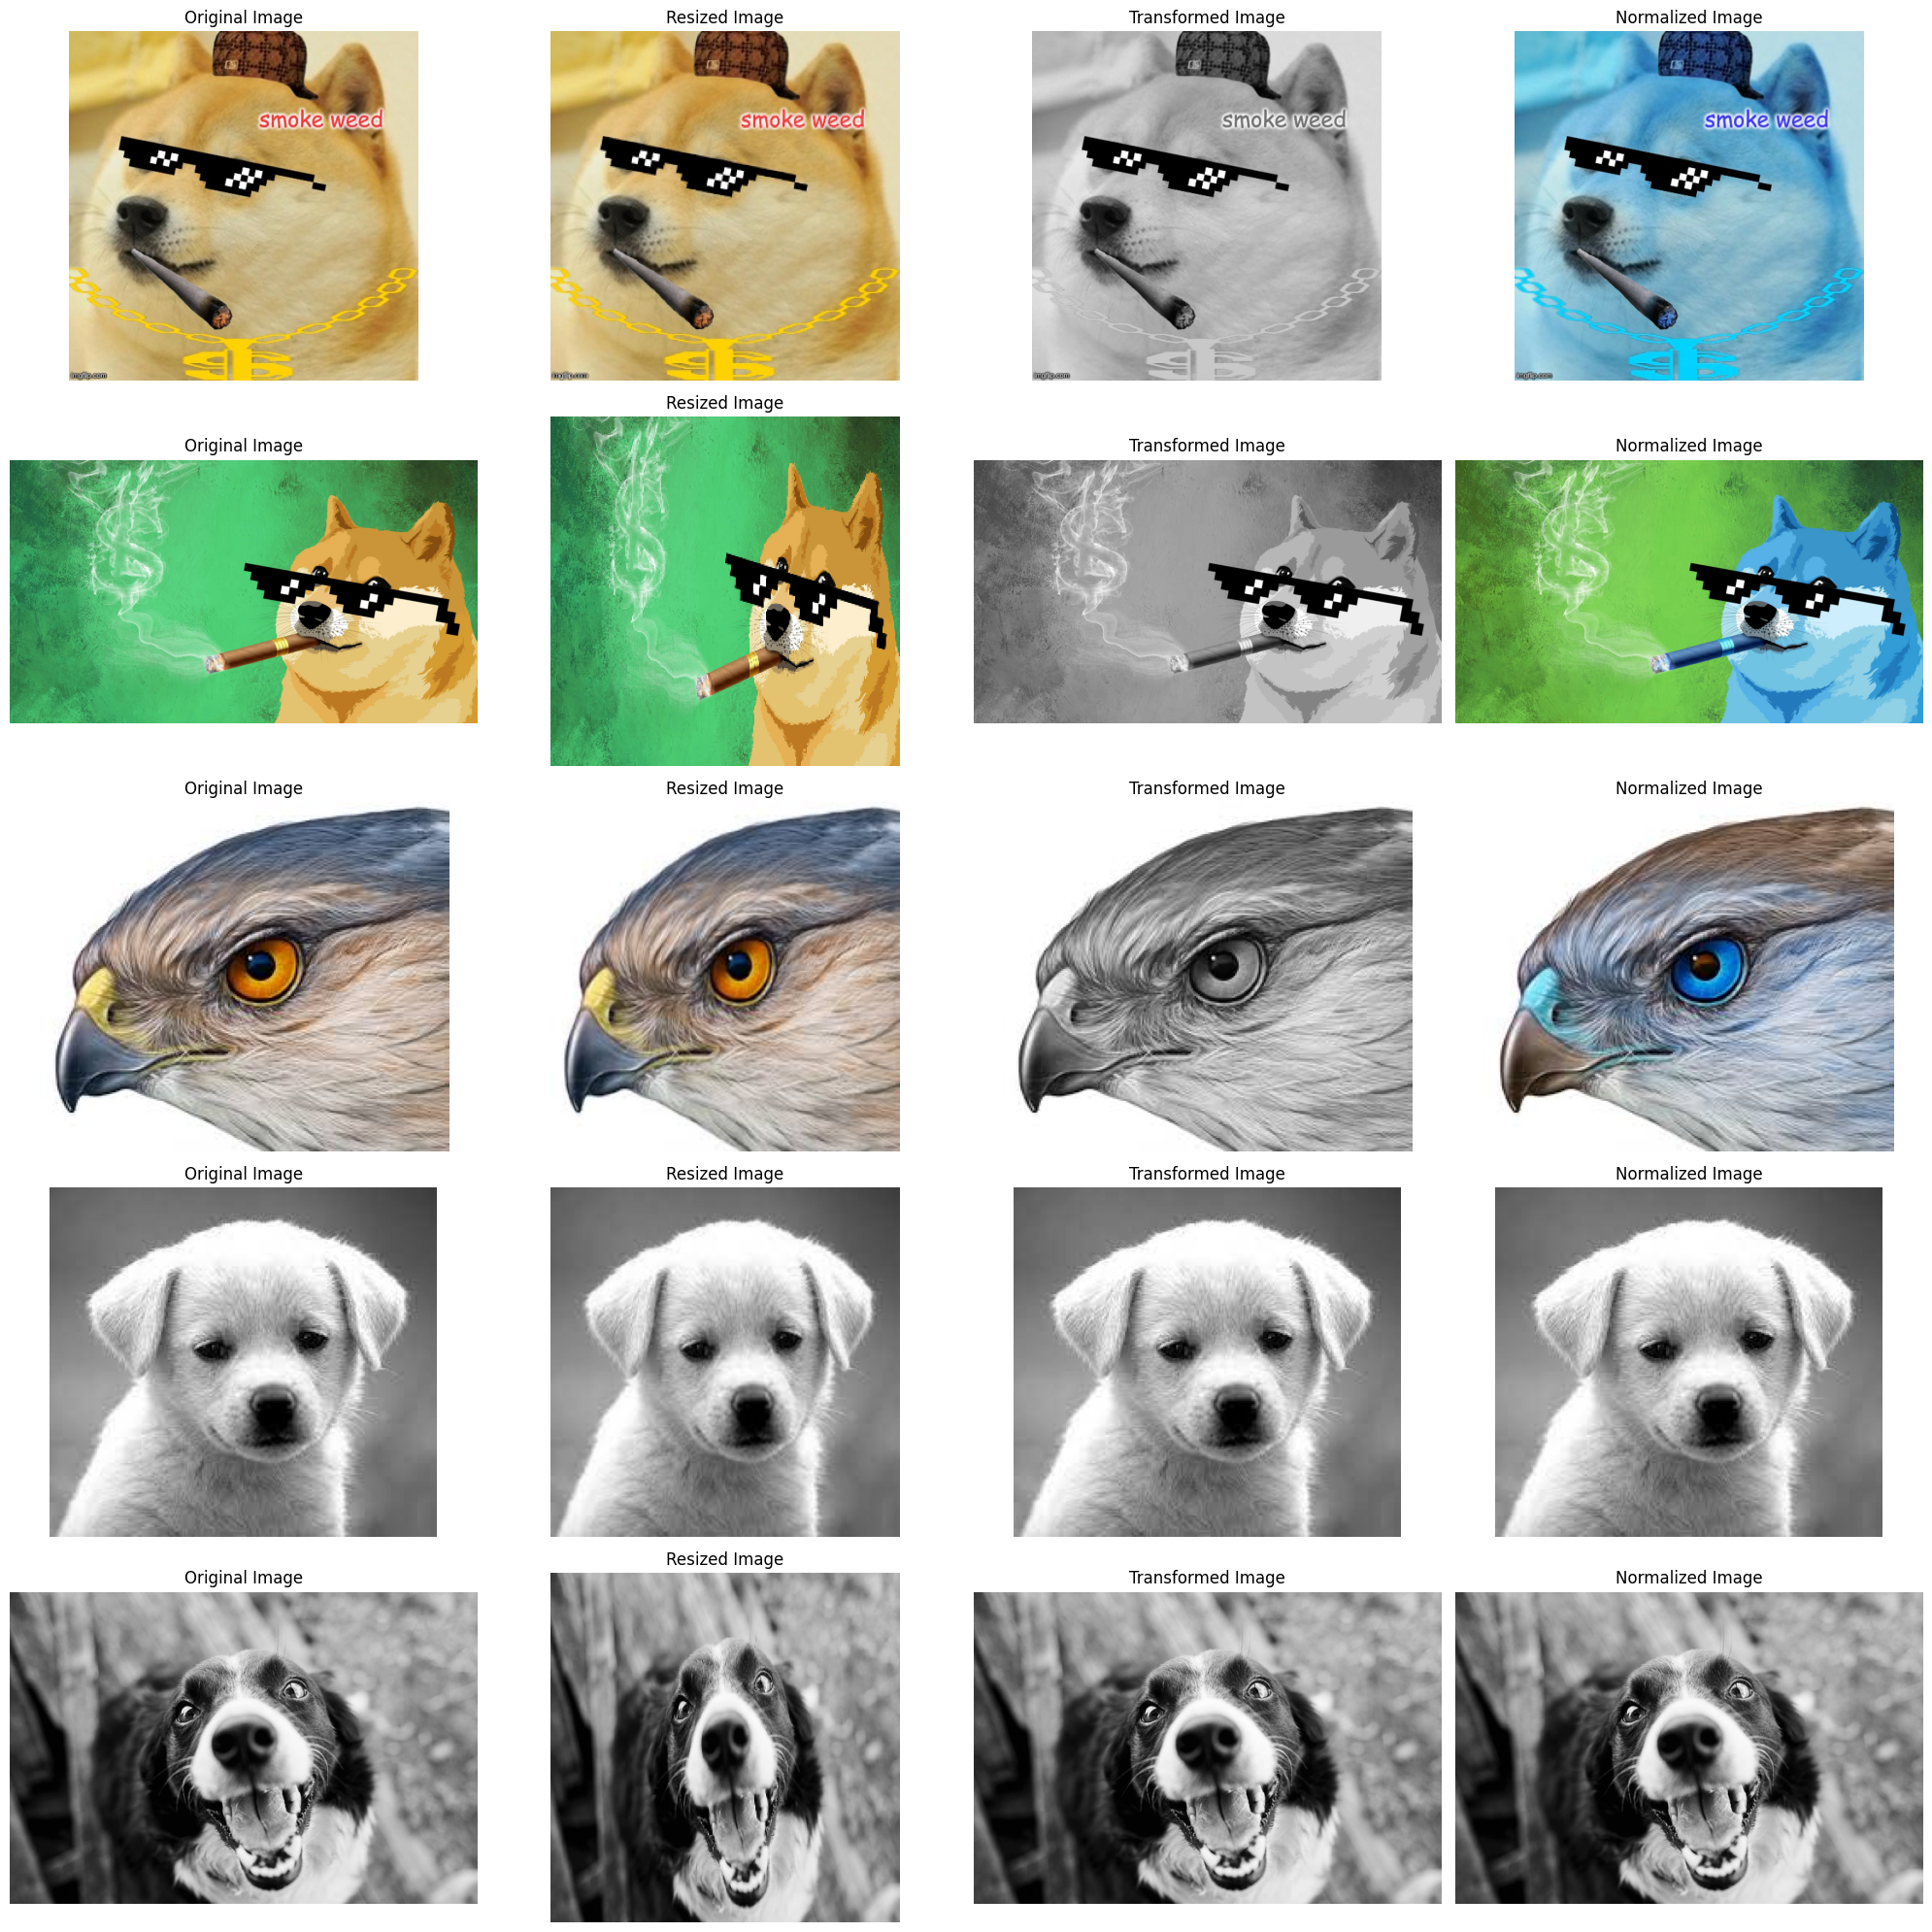

In [8]:
import os
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt

def read_images_from_folder(folder_path):
    images = []
    image_files = []
    for filename in os.listdir(folder_path):
        img = cv2.imread(os.path.join(folder_path, filename))
        if img is not None:
            images.append(img)
            image_files.append(filename)
    return images, image_files

def resize_images(images, new_size=(300, 300)):
    resized_images = []
    for img in images:
        resized_img = cv2.resize(img, new_size)
        resized_images.append(resized_img)
    return resized_images

def apply_color_transform(images):
    transformed_images = []
    for img in images:
        transformed_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        transformed_images.append(transformed_img)
    return transformed_images

def normalize_images(images):
    normalized_images = []
    for img in images:
        # Example normalization: Convert to float32 and scale to [0, 1]
        normalized_img = img.astype('float32') / 255.0
        normalized_images.append((normalized_img * 255).astype('uint8'))
    return normalized_images

folder_path = r"E:\3.2\Imran Sir\All_Lab (ICE-3208)\All_Lab (ICE-3208)\input"
output_folder = r"E:\3.2\Imran Sir\All_Lab (ICE-3208)\All_Lab (ICE-3208)\new"




# Read images from the folder
images, image_files = read_images_from_folder(folder_path)

# Resize images
resized_images = resize_images(images)

# Apply color transform
transformed_images = apply_color_transform(images)

# Normalize images
normalized_images = normalize_images(images)

# Plot original, resized, transformed, and normalized images
fig, axes = plt.subplots(nrows=len(images), ncols=4, figsize=(20, 4*len(images)))
for i in range(len(images)):
    axes[i, 0].imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    axes[i, 0].set_title('Original Image')
    axes[i, 0].axis('off')
    axes[i, 1].imshow(cv2.cvtColor(resized_images[i], cv2.COLOR_BGR2RGB))
    axes[i, 1].set_title('Resized Image')
    axes[i, 1].axis('off')
    axes[i, 2].imshow(transformed_images[i], cmap='gray')
    axes[i, 2].set_title('Transformed Image')
    axes[i, 2].axis('off')
    axes[i, 3].imshow(normalized_images[i], cmap='gray')
    axes[i, 3].set_title('Normalized Image')
    axes[i, 3].axis('off')
plt.tight_layout()
plt.show()


Applying different types of filter's on images

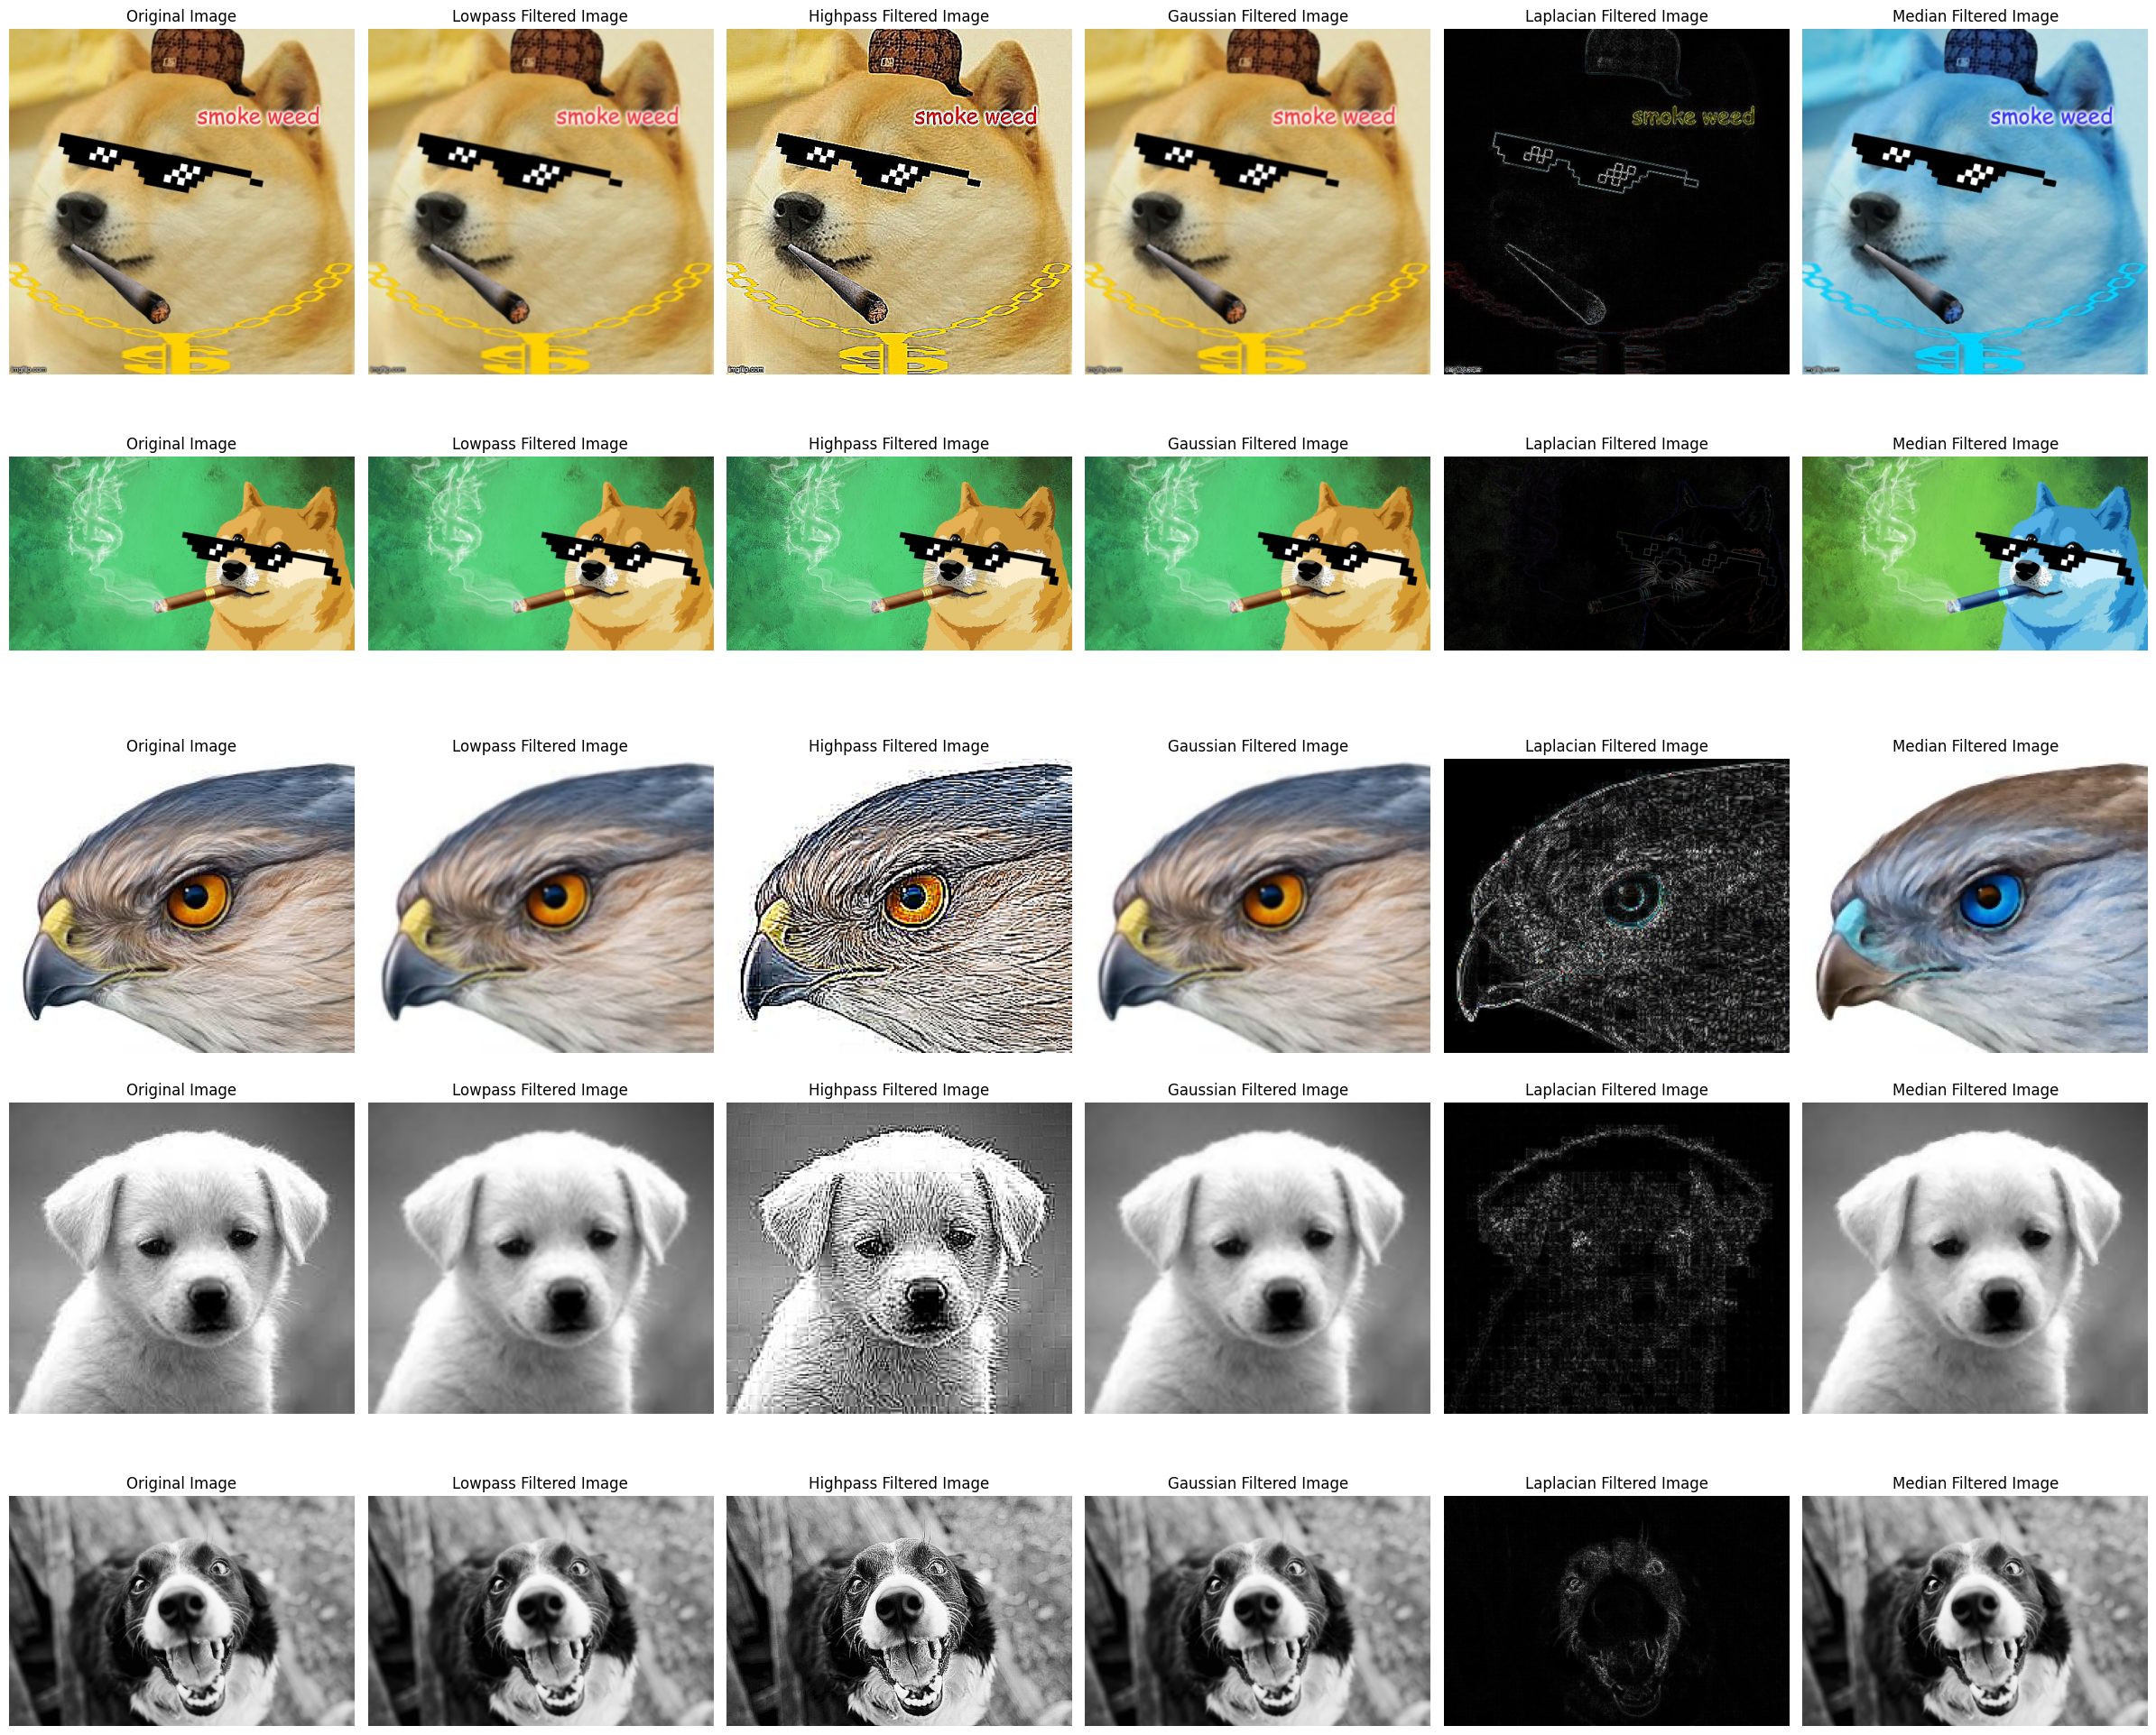

In [12]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

def read_images_from_folder(folder_path):
    images = []
    image_files = []
    for filename in os.listdir(folder_path):
        img = cv2.imread(os.path.join(folder_path, filename))
        if img is not None:
            images.append(img)
            image_files.append(filename)
    return images, image_files

def save_image(image, output_folder, filename):
    output_path = os.path.join(output_folder, filename)
    cv2.imwrite(output_path, image)

def lowpass_filter(images, output_folder):
    lowpass_images = []
    for i, img in enumerate(images):
        lowPass = cv2.GaussianBlur(img, (3, 3), 0)
        save_image(lowPass, output_folder, f"lowpass_{i}.jpg")
        lowpass_images.append(lowPass)
    return lowpass_images

def highpass_filter(images, output_folder):
    highpass_images = []
    for i, img in enumerate(images):
        kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
        highPass = cv2.filter2D(img, -1, kernel)
        save_image(highPass, output_folder, f"highpass_{i}.jpg")
        highpass_images.append(highPass)
    return highpass_images

def gaussian_filter(images, output_folder):
    gaussian_images = []
    for i, img in enumerate(images):
        gaussian = cv2.GaussianBlur(img, (3, 3), 0)
        save_image(gaussian, output_folder, f"gaussian_{i}.jpg")
        gaussian_images.append(gaussian)
    return gaussian_images

def laplacian_filter(images, output_folder):
    laplacian_images = []
    for i, img in enumerate(images):
        laplacian = cv2.Laplacian(img, cv2.CV_64F)
        laplacian = np.uint8(np.absolute(laplacian))
        save_image(laplacian, output_folder, f"laplacian_{i}.jpg")
        laplacian_images.append(laplacian)
    return laplacian_images

def median_filter(images, output_folder):
    median_images = []
    for i, img in enumerate(images):
        median = cv2.medianBlur(img, 3)
        save_image(median, output_folder, f"median_{i}.jpg")
        median_images.append(median)
    return median_images

def plot_filtered_images(images, lowpass_images, highpass_images, gaussian_images, laplacian_images, median_images):
    fig, axes = plt.subplots(nrows=len(images), ncols=6, figsize=(24, 4*len(images)))
    for i in range(len(images)):
        axes[i, 0].imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
        axes[i, 0].set_title('Original Image')
        axes[i, 0].axis('off')
        axes[i, 1].imshow(cv2.cvtColor(lowpass_images[i], cv2.COLOR_BGR2RGB))
        axes[i, 1].set_title('Lowpass Filtered Image')
        axes[i, 1].axis('off')
        axes[i, 2].imshow(cv2.cvtColor(highpass_images[i], cv2.COLOR_BGR2RGB))
        axes[i, 2].set_title('Highpass Filtered Image')
        axes[i, 2].axis('off')
        axes[i, 3].imshow(cv2.cvtColor(gaussian_images[i], cv2.COLOR_BGR2RGB))
        axes[i, 3].set_title('Gaussian Filtered Image')
        axes[i, 3].axis('off')
        axes[i, 4].imshow(laplacian_images[i], cmap='gray')
        axes[i, 4].set_title('Laplacian Filtered Image')
        axes[i, 4].axis('off')
        axes[i, 5].imshow(median_images[i], cmap='gray')
        axes[i, 5].set_title('Median Filtered Image')
        axes[i, 5].axis('off')
    plt.tight_layout()
    plt.show()

# Path to the folder containing images

folder_path = r"E:\3.2\Imran Sir\All_Lab (ICE-3208)\All_Lab (ICE-3208)\input"
# output_folder = r"E:\3.2\Imran Sir\All_Lab (ICE-3208)\All_Lab (ICE-3208)\new"



# Output folders for filtered images
output_folder_lowpass = "output/lowpass_images"
output_folder_highpass = "output/highpass_images"
output_folder_gaussian = "output/gaussian_images"
output_folder_laplacian = "output/laplacian_images"
output_folder_median = "output/median_images"

# Create output folders if they don't exist
os.makedirs(output_folder_lowpass, exist_ok=True)
os.makedirs(output_folder_highpass, exist_ok=True)
os.makedirs(output_folder_gaussian, exist_ok=True)
os.makedirs(output_folder_laplacian, exist_ok=True)
os.makedirs(output_folder_median, exist_ok=True)

# Read images from the folder
images, image_files = read_images_from_folder(folder_path)

# Apply filters to images and save filtered images
lowpass_images = lowpass_filter(images, output_folder_lowpass)
highpass_images = highpass_filter(images, output_folder_highpass)
gaussian_images = gaussian_filter(images, output_folder_gaussian)
laplacian_images = laplacian_filter(images, output_folder_laplacian)
median_images = median_filter(images, output_folder_median)

# Plot filtered images
plot_filtered_images(images, lowpass_images, highpass_images, gaussian_images, laplacian_images, median_images)
